# Seasonality

In [1]:
from ruamel.yaml import YAML
import numpy as np
import pandas as pd
from fredapi import Fred
from statsmodels.tsa import x13, stattools
import altair as alt
from box_jenkins import Corr

In [2]:
emp_not_sa = pd.read_csv("emp.csv", header=0, parse_dates=[0], index_col=0, squeeze=True)
corr = Corr(emp_not_sa.diff()[1:])
corr.plot()

alt.VConcatChart(...)

In [3]:
corr.qstat

,values,pvalues
1,0.339455,5.601440e-01
2,34.344547,3.484788e-08
3,46.706721,4.012461e-10
4,66.834770,1.056312e-13
5,70.494220,8.086702e-14


In [14]:
y = x13.x13_arima_analysis(
    endog = emp_not_sa.diff()[1:]
)

/home/jonathan/Projects/box_jenkins/.venv/lib/python3.8/site-packages/statsmodels/tsa/x13.py:187: X13Warning: WARNING: Automatic transformation selection cannot be done on a
          series with zero or negative values.

 NOTE: Unable to test LS2020.May due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

 NOTE: Unable to test LS2020.Jul due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

 NOTE: Unable to test LS2020.Aug due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

 NOTE: Unable to test LS1945.Oct due to regression matrix singularity.
       The effect of this outlier is already accou

In [19]:
corr = Corr(y.irregular)
corr.plot()

alt.VConcatChart(...)

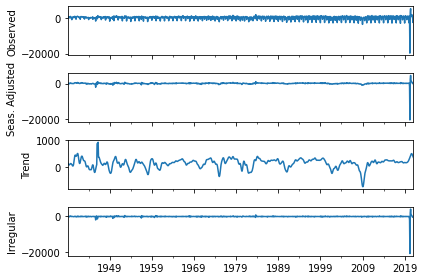

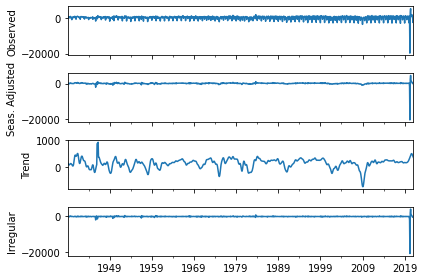

In [16]:
y.plot()

In [2]:
# Load the config settings
yaml=YAML(typ='safe')
with open("config.yml", "r") as config_file:
    config = yaml.load(config_file)

fred_api_key = config['fred-api-key']

In [3]:
fred = Fred(api_key=fred_api_key)

In [10]:
# All Employees, Total Nonfarm in Thousands of Persons monthly
emp_not_sa = fred.get_series("PAYNSA")
emp_sa = fred.get_series("PAYEMS")

emp_not_sa.to_csv("emp.csv")

In [5]:
df_not_sa = emp_not_sa.copy().reset_index().rename(columns={"index":"date", 0:"persons"})
df_not_sa['type'] = "Not Seasonally Adjusted"
df_sa = emp_sa.copy().reset_index().rename(columns={"index":"date", 0:"persons"})
df_sa['type'] = "Seasonally Adjusted"
emp_df = pd.concat([df_not_sa, df_sa])

In [6]:
plot = alt.Chart(emp_df).mark_line().encode(
    x=alt.X('date:T', axis = alt.Axis(title="Monthly")),
    y=alt.Y('persons:Q', axis = alt.Axis(title="Thousands of Persons")),
    color=alt.Color('type:N', legend = alt.Legend(title="Adjustment")),
    strokeDash='type',
).properties(
    title = "US Total All Nonfarm Employees"
).interactive()

plot

alt.Chart(...)

In [4]:
corr.plot()

alt.VConcatChart(...)

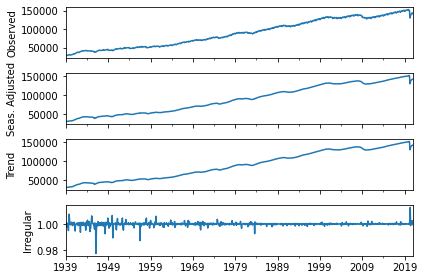

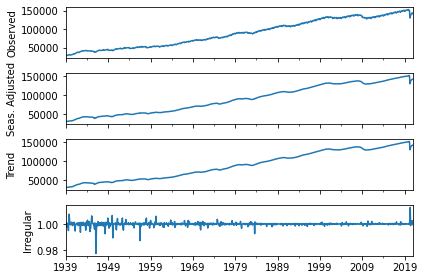

In [11]:
y.plot()